# 🎓 Course:  Convolutional Neural Networks for Image Classification

## &nbsp; ⛩️ Section-9
### &nbsp; &nbsp; 🎛️ 2D Image Convolution: Numpy, Tensorflow, Keras

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;**Description:**  
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;*Explained theory on how **2D Convolutional Layer** creates **feature maps**.*  
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;*Instructions on how to use **Tensorflow** and **Keras** functions **‘get_weights()’** and **‘set_weights()’**.*  

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;**File:** *2d_image_convolution.ipynb*

### 💡 Algorithm:

**✔️ Step 1:** Load input image  
**✔️ Step 2:** Set up filters for **edge detection**  
**✔️ Step 3:** Apply 2D convolution by **'for' loops**  
**✔️ Step 4:** Apply 2D convolution by **Tensorflow**  
**✔️ Step 5:** Apply 2D convolution by **Keras**  
**✔️ Step 6:** Compute **time** spent for 2D convolution  
**✔️ Step 7:** Implement 2D convolution on **video**  
  
  
### 🎯 **Result:**  
**✅ Plot** of GRAY images with detected edges  
**✅ Time** spent for 2D convolution by different approaches  
**✅ Video** of GRAY object with detected edge  
**✅ Video** of RGB object with bounding box and label  
  

# 📥 Import libraries

In [1]:
# Importing needed libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Importing library to see calculation progress inside loops in Real Time
from tqdm import tqdm


# Importing Tensorflow
import tensorflow as tf


# Importing Keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.utils import plot_model


# Importing timer
from timeit import default_timer as timer


# Check point
# Hint: to print emoji via Unicode, replace '+' with '000' and add prefix '\'
# For instance, emoji with Unicode 'U+1F44C' can be printed as '\U0001F44C'
print('Libraries are successfully loaded ' + '\U0001F44C')


Libraries are successfully loaded 👌


# 🖼️ Step 1: Load input image

📜 **Content:**  
  
💠 1.**1** **Load** input image by OpenCV  
💠 1.**2** **Visualize** input image  
💠 1.**3** **Prepare** input to the 2D Convolutional Layer  


### 1.1 Load input image by OpenCV

In [2]:
# Reading input image by OpenCV library
# In this way image is opened as Numpy array

# (!) OpenCV by default reads images in BGR format (order of channels)
# (!) On Windows, the path might look like following:
# r'images\cat.png'
# or:
# 'images\\cat.png'
image_BGR = cv2.imread('images/cat.png')


# Converting image to RGB by OpenCV function
image_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)


# Converting image to GRAY by OpenCV function
image_GRAY = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2GRAY)


# Check points
# Showing type and shapes of loaded and converted image
print('Type of image_BGR is   :', type(image_BGR))
print('Shape of image_RGB is  :', image_RGB.shape)
print('Shape of image_GRAY is :', image_GRAY.shape)


Type of image_BGR is   : <class 'numpy.ndarray'>
Shape of image_RGB is  : (853, 1280, 3)
Shape of image_GRAY is : (853, 1280)


### 1.2 Visualize input image

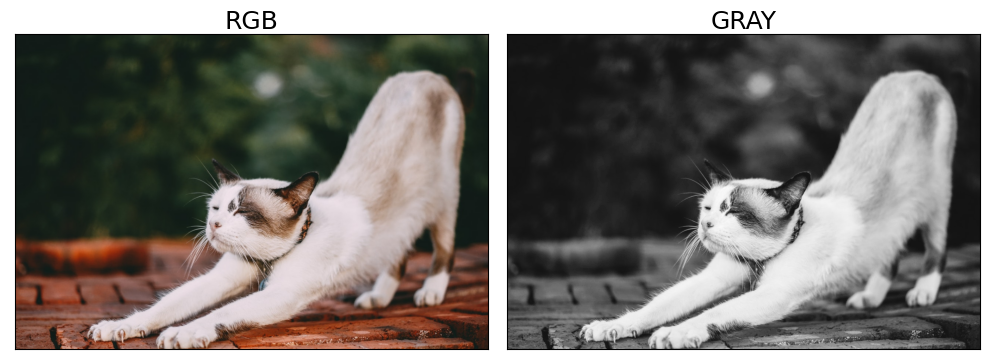

In [3]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (10.0, 8.0)


# Defining a figure object with number of needed subplots
figure, ax = plt.subplots(nrows=1, ncols=2)
# ax is a (2,) Numpy array and to access specific subplot we call it by ax[0]


# Adjusting 1st column with RGB image
ax[0].imshow(image_RGB)


# Adjusting 2nd column with GRAY image
ax[1].imshow(image_GRAY, cmap=plt.get_cmap('gray'))


# Hiding axes to all subplots
for i in range(2):
    ax[i].axes.xaxis.set_ticks([])
    ax[i].axes.yaxis.set_ticks([])


# Giving names to subplots along X axis
ax[0].set_xlabel('RGB', fontsize=18)
ax[1].set_xlabel('GRAY', fontsize=18)


# Moving subplots names to the top positions
ax[0].xaxis.set_label_position('top')
ax[1].xaxis.set_label_position('top')


# Adjusting distance between subplots
plt.tight_layout()


# Showing the plot
plt.show()


### 1.3 Prepare input to the 2D Convolutional Layer

In [4]:
# Check points
# Showing shapes of GRAY and RGB images
print('Shape of image_GRAY is   :', image_GRAY.shape)
print('Shape of image_RGB is    :', image_RGB.shape)
print()


# Reshaping GRAY image to get following: (batch size, rows, columns, channels)
x_input_GRAY = image_GRAY.reshape(1, image_GRAY.shape[0], image_GRAY.shape[1], 1).astype(np.float32)


# Reshaping RGB image to get following: (batch size, rows, columns, channels)
x_input_RGB = image_RGB.reshape(1, image_RGB.shape[0], image_RGB.shape[1], 3).astype(np.float32)


# Check points
# Showing shapes of reshaped images
print('Shape of x_input_GRAY is :', x_input_GRAY.shape)
print('Shape of x_input_RGB is  :', x_input_RGB.shape)


Shape of image_GRAY is   : (853, 1280)
Shape of image_RGB is    : (853, 1280, 3)

Shape of x_input_GRAY is : (1, 853, 1280, 1)
Shape of x_input_RGB is  : (1, 853, 1280, 3)


#  🌀 Step 2: Set up filters for edge detection

📜 **Content:**  
  
💠 2.**1** **Define** 1-channeled common 3x3 filters (kernels) for edge detection  
💠 2.**2** **Extend** 1-channeled filters to 3-channeled with identical channels  
💠 2.**3** **Assemble** 1-channeled filters into united array  
💠 2.**4** **Assemble** 3-channeled filters into united array  


### 2.1 Define 1-channeled common 3x3 filters (kernels) for edge detection

In [5]:
# Sobel filter to detect vertical changes on image
f1 = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]])


# Laplacian filter to detect regions with different brightness on image
f2 = np.array([[0, 1, 0], 
               [1, -4, 1], 
               [0, 1, 0]])


# Check points
# Showing shapes of the filters
print('Shape of the Sobel filter     is :', f1.shape)
print('Shape of the Laplacian filter is :', f2.shape)


Shape of the Sobel filter     is : (3, 3)
Shape of the Laplacian filter is : (3, 3)


### 2.2 Extend 1-channeled filters to 3-channeled with identical channels

In [6]:
# Collecting 3 channels for the Sobel filter
f1_3 = np.array((f1, f1, f1))


# Moving channels dimension to the last position: (height, width, channels)
f1_3 = f1_3.transpose(1, 2, 0)


# Check points
# Showing one channel and shape of the 3-channeled filter
print(f1_3[:, :, 0])
print()
print(f1_3.shape)
print()

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]

(3, 3, 3)



In [7]:
# Collecting 3 channels for the Laplacian filter
f2_3 = np.array((f2, f2, f2))


# Moving channels dimension to the last position: (height, width, channels)
f2_3 = f2_3.transpose(1, 2, 0)


# Check points
# Showing one channel and shape of the 3-channeled filter
print(f2_3[:, :, 0])
print()
print(f2_3.shape)


[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]

(3, 3, 3)


### 2.3 Assemble 1-channeled filters into united array

In [8]:
# Assembling 1-channeled filters into one, united array
f11 = np.array((f1, f2))


# Check point
# Showing shape of the united array
print(f11.shape)  # (2, 3, 3)


# Reshaping united array to get following: (filters, height, width, channels)
f11 = f11.reshape(f11.shape + tuple([1]))


# Check point
# Showing shape of the united array
print(f11.shape)  # (2, 3, 3, 1)


# Moving filters dimension to the last position: (height, width, channels, filters)
f11 = f11.transpose(1, 2, 3, 0)


# Check point
# Showing shape of the united array
print(f11.shape)  # (3, 3, 1, 2)
print()


# Check points
# Showing one channel of the 2 filters from united array
print(f11[:, :, 0, 0])
print()
print(f11[:, :, 0, 1])


(2, 3, 3)
(2, 3, 3, 1)
(3, 3, 1, 2)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]

[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


### 2.4 Assemble 3-channeled filters into united array

In [9]:
# Assembling 3-channeled filters into one, united array
f22 = np.array((f1_3, f2_3))


# Check point
# Showing shape of the united array
print(f22.shape)  # (2, 3, 3, 3)


# Moving filters dimension to the last position: (height, width, channels, filters)
f22 = f22.transpose(1, 2, 3, 0)


# Check point
# Showing shape of the united array
print(f22.shape)  # (3, 3, 3, 2)
print()


# Check points
# Showing one channel of the 2 filters from united array
print(f22[:, :, 0, 0])
print()
print(f22[:, :, 0, 1])


(2, 3, 3, 3)
(3, 3, 3, 2)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]

[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


#  ➰ Step 3: Apply 2D convolution by 'for' loops

📜 **Content:**  
  
💠 3.**1** **Set up** hyperparameters  
💠 3.**2** **Apply** pad frame to GRAY input  
💠 3.**3** **Apply** 2D convolution by 'for' loops to GRAY input  
💠 3.**4** **Exclude** non-needed values (less than 0 and more than 255)  
💠 3.**5** **Visualize** obtained feature map  


### 3.1 Set up hyperparameters

**Preparing hyperparameters for convolution**  
To get convolved image with the same dimension as input image, it is needed to set following:  
  
> <font color='#00a1e6' size=3>$f_{size} = 3$</font>, filter size (kernel), width and height are equal;  
> <font color='#00a1e6' size=3>$stride = 1$</font>, stride (step) for sliding;  
> <font color='#00a1e6' size=3>$pad = 1$</font>, pad to process boundaries (zero valued frame around image).  

Output image dimension is calculated by following equations:  
> <font color='#00a1e6' size=4>$height_{output} = \frac {height_{input} - f_{size} + 2 * pad}{step} + 1$</font>  
>  
> <font color='#00a1e6' size=4>$width_{output} = \frac {width_{input} - f_{size} + 2 * pad}{step} + 1$</font>
  
For instance, dimension of the input GRAY image is 853x1280 (height and width), then dimension of the output image will be as following:  
> <font color='#00a1e6' size=4>$height_{output} = \frac {853 - 3 + 2 * 1}{1} + 1 = 853$</font>  
>  
> <font color='#00a1e6' size=4>$width_{output} = \frac {1280 - 3 + 2 * 1}{1} + 1 = 1280$</font>  


### 3.2 Apply pad frame to GRAY input

In [10]:
# Applying to input GRAY image pad frame with zero values to process boundaries
# Using Numpy method 'pad'
image_GRAY_pad = np.pad(image_GRAY, (1, 1), mode='constant', constant_values=0)


# Check points
# Showing shapes of input GRAY image and its version with pad frame
print('Shape of image_GRAY is : ', image_GRAY.shape)
print('With pad               : ', image_GRAY_pad.shape)
print()


Shape of image_GRAY is :  (853, 1280)
With pad               :  (855, 1282)



### 3.3 Apply 2D convolution by 'for' loops to GRAY input

In [11]:
# Preparing zero valued array for convolved output image
# Dimension is the same with input image according to chosen hyperparameters
# Passing as argument tuple with needed shape
output = np.zeros(image_GRAY.shape)


# Check point
# Showing shape of the output
print('Shape of the output is : ', output.shape)


Shape of the output is :  (853, 1280)


In [12]:
# Implementing convolution operation to GRAY image
# Sliding through entire input image (that is with pad frame) by Sobel filter
# Wrapping the loop with 'tqdm' in order to see progress in Real Time
for i in tqdm(range(image_GRAY_pad.shape[0] - 2)):
    for j in range(image_GRAY_pad.shape[1] - 2):
        # Extracting (slicing) a 3x3 patch (the same size with filter)
        # from input image with pad frame
        patch = image_GRAY_pad[i:i+3, j:j+3]

        # Applying elementwise multiplication and summation -
        # this is convolution operation
        # When we use '*' with matrices, then elementwise multiplication
        # will be applied

        # With Sobel filter
        output[i, j] = np.sum(patch * f1)


# Check point
print('Convolution is successfully applied ' + '\U0001F44C')


100%|███████████████████████████████████████████████████████████████████████████████| 853/853 [00:06<00:00, 122.72it/s]

Convolution is successfully applied 👌


### 3.4 Exclude non-needed values (less than 0 and more than 255)

In [13]:
# Check point
print(output)


[[ -75.    1.    3. ...   -4.   -3.  231.]
 [ -99.    3.    3. ...   -7.   -4.  307.]
 [ -97.    3.    1. ...   -7.   -4.  303.]
 ...
 [-319.   -1.   73. ...    0.    0.  128.]
 [-368.   17.   65. ...    0.    0.  128.]
 [-293.   20.   36. ...    0.    0.   96.]]


In [14]:
# To exclude values that are less than 0 and more than 255,
# Numpy function 'clip' is applied
# It keeps values of Numpy array in the given range
# And it replaces non-needed values with boundary numbers
output = np.clip(output, 0, 255)


# Check point
print(output)


[[  0.   1.   3. ...   0.   0. 231.]
 [  0.   3.   3. ...   0.   0. 255.]
 [  0.   3.   1. ...   0.   0. 255.]
 ...
 [  0.   0.  73. ...   0.   0. 128.]
 [  0.  17.  65. ...   0.   0. 128.]
 [  0.  20.  36. ...   0.   0.  96.]]


### 3.5 Visualize obtained feature map

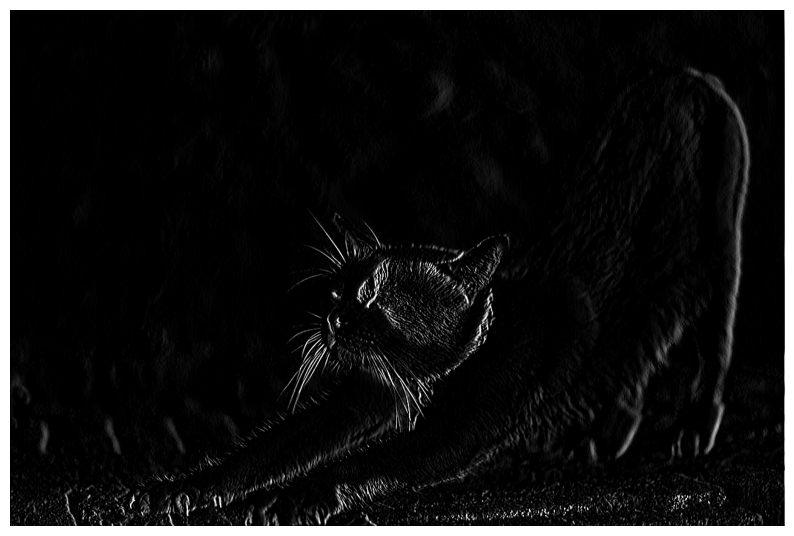

In [15]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (10.0, 8.0)


# Creating a plot with convolved image
plt.imshow(output, cmap=plt.get_cmap('gray'))


# Hiding axes
plt.axis('off')


# Showing the plot
plt.show()


#  🔆 Step 4: Apply 2D convolution by Tensorflow

📜 **Content:**  
  
💠 4.**1** **Implement** *kernel_initializer*  
💠 4.**2** What if **bias** is **True?**  
💠 4.**3** **Implement** *weights=[]*  
💠 4.**4** What if **input** image is **RGB?**  
💠 4.**5** How to use **set of filters** in one layer?  
💠 4.**6** Visualize **final results**  


## 4.1 Implement kernel_initializer

📜 **Sub-Content:**  
  
💠 4.1.**1** **Initialize** 2D Convolutional Layer by Tensorflow for GRAY input  
💠 4.1.**2** **Pass** GRAY input through Tensorflow Conv2D layer  
💠 4.1.**3** **Slice** from the output just feature map  
💠 4.1.**4** **Exclude** non-needed values (less than 0 and more than 255)  
💠 4.1.**5** **Visualize** obtained feature map  
💠 4.1.**6** **Get** current weights  
💠 4.1.**7** **Set up** new weights  
💠 4.1.**8** **Pass** GRAY input through Tensorflow Conv2D layer with updated weights  
💠 4.1.**9** **Visualize** newly obtained feature map  


### 4.1.1 Initialize 2D Convolutional Layer by Tensorflow for GRAY input

In [16]:
# If you're using environment for GPU, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, try out following options:
# Option-1: close all Jupyter Notebooks, and re-open just this one Jupyter Notebook
# Option-2: switch to the environment for CPU usage only instead of GPU


# Initializing Conv2D layer for GRAY input
layer = tf.keras.layers.Conv2D(filters=1,
                               kernel_size=(3, 3),
                               strides=1,
                               padding='same',
                               activation='relu',
                               input_shape=x_input_GRAY.shape[1:],
                               use_bias=False,
                               kernel_initializer=tf.keras.initializers.constant(f1))


# Check point
print('Tensorflow Conv2D layer is successfully initialized ' + '\U0001F44C')


Tensorflow Conv2D layer is successfully initialized 👌


### 4.1.2 Pass GRAY input through Tensorflow Conv2D layer

In [17]:
# Passing GRAY input to the initialized Conv2D layer
output = layer(x_input_GRAY)


# Check points
print('Convolution is successfully applied ' + '\U0001F44C')
print('\n' + 'Shape of the output is :', output.shape)
print('\n')
print('\n' + 'Data type of the output is :', type(output))


Convolution is successfully applied 👌

Shape of the output is : (1, 853, 1280, 1)



Data type of the output is : <class 'tensorflow.python.framework.ops.EagerTensor'>


### 4.1.3 Slice from the output just feature map

In [18]:
# Slicing from the output just feature map
# Converting output Tensor into Numpy array
output = np.array(output[0, :, :, 0])


# Check points
print('Shape of the output is :', output.shape)
print('\n')
print('\n' + 'Data type of the output is :', type(output))
print('\n')
print(output)


Shape of the output is : (853, 1280)



Data type of the output is : <class 'numpy.ndarray'>


[[  0.   1.   3. ...   0.   0. 231.]
 [  0.   3.   3. ...   0.   0. 307.]
 [  0.   3.   1. ...   0.   0. 303.]
 ...
 [  0.   0.  73. ...   0.   0. 128.]
 [  0.  17.  65. ...   0.   0. 128.]
 [  0.  20.  36. ...   0.   0.  96.]]


### 4.1.4 Exclude non-needed values (less than 0 and more than 255)

In [19]:
# To exclude values that are less than 0 and more than 255,
# Numpy function 'clip' is applied
# It keeps values of Numpy array in the given range
# And it replaces non-needed values with boundary numbers
output = np.clip(output, 0, 255)


# Check point
print(output)


[[  0.   1.   3. ...   0.   0. 231.]
 [  0.   3.   3. ...   0.   0. 255.]
 [  0.   3.   1. ...   0.   0. 255.]
 ...
 [  0.   0.  73. ...   0.   0. 128.]
 [  0.  17.  65. ...   0.   0. 128.]
 [  0.  20.  36. ...   0.   0.  96.]]


### 4.1.5 Visualize obtained feature map

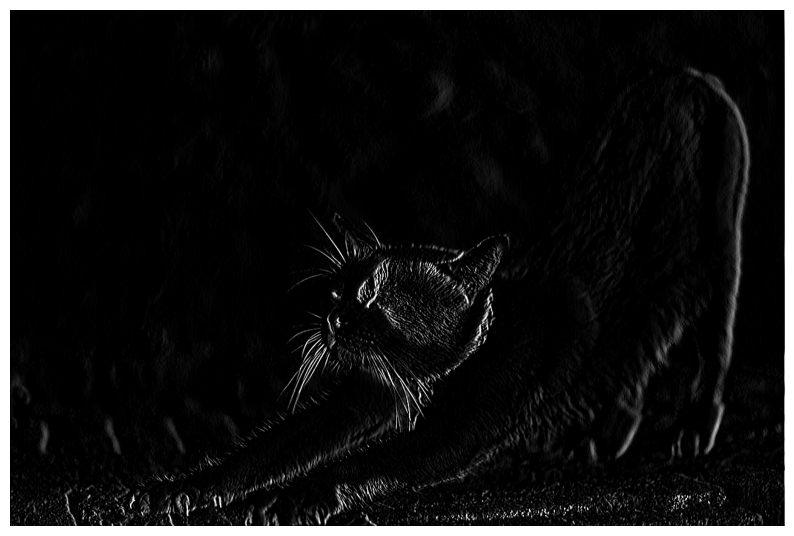

In [20]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (10.0, 8.0)


# Creating a plot with convolved image
plt.imshow(output, cmap=plt.get_cmap('gray'))


# Hiding axes
plt.axis('off')


# Showing the plot
plt.show()


### 4.1.6 Get current weights

In [21]:
# Getting type of the container that holds weights
print('Datatype of the container that holds weights is :', type(layer.get_weights()))  # list
print('Datatype of the container that holds weights is :', type(layer.weights))        # list
print()


# Getting lengths of the list that holds weights
print('Lengths of the list that holds weights is       :', len(layer.get_weights()))   # 1
print('Lengths of the list that holds weights is       :', len(layer.weights))         # 1
print()


# Showing shape of the weights
print(layer.get_weights()[0].shape)  # (3, 3, 1, 1)
print(layer.weights[0].shape)        # (3, 3, 1, 1)
print('\n')


# Getting type of weights themselves
print(type(layer.get_weights()[0]))  # Numpy array
print(type(layer.weights[0]))        # tf.Tensor
print()


# Showing one channel of the weights themselves
print(layer.get_weights()[0][:, :, 0, 0])
print()
print(layer.weights[0][:, :, 0, 0])


Datatype of the container that holds weights is : <class 'list'>
Datatype of the container that holds weights is : <class 'list'>

Lengths of the list that holds weights is       : 1
Lengths of the list that holds weights is       : 1

(3, 3, 1, 1)
(3, 3, 1, 1)


<class 'numpy.ndarray'>
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>

[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]]

tf.Tensor(
[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]], shape=(3, 3), dtype=float32)


### 4.1.7 Set up new weights

In [22]:
# Showing shape of the pre-defined filter
print(f2.shape)


# Reshaping filter to get following: (height, width, channels, filters)
f_new = f2.reshape(3, 3, 1, 1)


# Showing shape of the updated filter
print(f_new.shape)


(3, 3)
(3, 3, 1, 1)


In [23]:
# Showing one channel of the current weights
print(layer.get_weights()[0][:, :, 0, 0])
print()


# Setting up new weights
layer.set_weights([f_new])


# Showing one channel of the updated weights
print(layer.get_weights()[0][:, :, 0, 0])


[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]]

[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]


### 4.1.8 Pass GRAY input through Tensorflow Conv2D layer with updated weights

In [24]:
# Passing GRAY input to the Conv2D layer with new weights
output = layer(x_input_GRAY)


# Slicing from the output just feature map
# Converting output Tensor into Numpy array
output = np.array(output[0, :, :, 0])


# Excluding non-needed values (less than 0 and more than 255)
output = np.clip(output, 0, 255)


# Check points
print('Convolution is successfully applied ' + '\U0001F44C')
print('\n' + 'Shape of the output is :', output.shape)
print('\n' + 'Feature map is successfully sliced from the output')
print('\n' + 'Non-needed values are successfully excluded')


Convolution is successfully applied 👌

Shape of the output is : (853, 1280)

Feature map is successfully sliced from the output

Non-needed values are successfully excluded


### 4.1.9 Visualize newly obtained feature map

In [25]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (10.0, 8.0)


# Creating a plot with convolved image
plt.imshow(output, cmap=plt.get_cmap('gray'))


# Hiding axes
plt.axis('off')


# Showing the plot
plt.show()


## 4.2 What if bias is True?

📜 **Sub-Content:**  
  
💠 4.2.**1** **Initialize** 2D Convolutional Layer by Tensorflow for GRAY input  
💠 4.2.**2** **Pass** GRAY input through Tensorflow Conv2D layer  
💠 4.2.**3** **Get** current weights and bias  
💠 4.2.**4** **Set up** new weights and bias  
💠 4.2.**5** **Pass** GRAY input through Tensorflow Conv2D layer with updated weights and bias  
💠 4.2.**6** **Visualize** newly obtained feature map  


### 4.2.1 Initialize 2D Convolutional Layer by Tensorflow for GRAY input

In [26]:
# If you're using environment for GPU, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, try out following options:
# Option-1: close all Jupyter Notebooks, and re-open just this one Jupyter Notebook
# Option-2: switch to the environment for CPU usage only instead of GPU


# Initializing Conv2D layer for GRAY input
layer = tf.keras.layers.Conv2D(filters=1,
                               kernel_size=(3, 3),
                               strides=1,
                               padding='same',
                               activation='relu',
                               input_shape=x_input_GRAY.shape[1:],
                               use_bias=True,
                               kernel_initializer=tf.keras.initializers.constant(f1))


# Check point
print('Tensorflow Conv2D layer is successfully initialized ' + '\U0001F44C')


Tensorflow Conv2D layer is successfully initialized 👌


### 4.2.2 Pass GRAY input through Tensorflow Conv2D layer

In [27]:
# Passing GRAY input to the initialized Conv2D layer
output = layer(x_input_GRAY)


# Check points
print('Convolution is successfully applied ' + '\U0001F44C')
print('\n' + 'Shape of the output is :', output.shape)


Convolution is successfully applied 👌

Shape of the output is : (1, 853, 1280, 1)


### 4.2.3 Get current weights and bias

In [28]:
# Getting type of the container that holds weights and bias
print('Datatype of the container that holds weights and bias is :', type(layer.get_weights()))


# Getting lengths of the list that holds weights and bias
print('Lengths of the list that holds weights and bias is       :', len(layer.get_weights()))
print()


# Showing shape of the weights
print(layer.get_weights()[0].shape)  # (3, 3, 1, 1)
print()


# Showing one channel of the weights themselves
print(layer.get_weights()[0][:, :, 0, 0])
print()


# Showing shape of the bias
print(layer.get_weights()[1].shape)
print()


# Showing bias itself
print(layer.get_weights()[1])


Datatype of the container that holds weights and bias is : <class 'list'>
Lengths of the list that holds weights and bias is       : 2

(3, 3, 1, 1)

[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]]

(1,)

[0.]


### 4.2.4 Set up new weights and bias

In [29]:
# Showing shape of the pre-defined filter
print(f2.shape)


# Reshaping filter to get following: (height, width, channels, filters)
f_new = f2.reshape(3, 3, 1, 1)


# Showing shape of the updated filter
print(f_new.shape)


(3, 3)
(3, 3, 1, 1)


In [30]:
# Defining array for bias
b = np.array([0.])


# Showing shape of the bias
print(b.shape)


(1,)


In [31]:
# Showing one channel of the current weights
print(layer.get_weights()[0][:, :, 0, 0])
print()


# Setting up new weights and bias
layer.set_weights([f_new, b])


# Showing one channel of the updated weights
print(layer.get_weights()[0][:, :, 0, 0])


[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]]

[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]


### 4.2.5 Pass GRAY input through Tensorflow Conv2D layer with updated weights and bias

In [32]:
# Passing GRAY input to the Conv2D layer with new weights
output = layer(x_input_GRAY)


# Slicing from the output just feature map
# Converting output Tensor into Numpy array
output = np.array(output[0, :, :, 0])


# Excluding non-needed values (less than 0 and more than 255)
output = np.clip(output, 0, 255)


# Check points
print('Convolution is successfully applied ' + '\U0001F44C')
print('\n' + 'Shape of the output is :', output.shape)
print('\n' + 'Feature map is successfully sliced from the output')
print('\n' + 'Non-needed values are successfully excluded')


Convolution is successfully applied 👌

Shape of the output is : (853, 1280)

Feature map is successfully sliced from the output

Non-needed values are successfully excluded


### 4.2.6 Visualize newly obtained feature map

In [33]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (10.0, 8.0)


# Creating a plot with convolved image
plt.imshow(output, cmap=plt.get_cmap('gray'))


# Hiding axes
plt.axis('off')


# Showing the plot
plt.show()


## 4.3 Implement weights=[]

📜 **Sub-Content:**  
  
💠 4.3.**1** **Set** up weights  
💠 4.3.**2** **Initialize** 2D Convolutional Layer by Tensorflow for GRAY input  
💠 4.3.**3** **Pass** GRAY input through Tensorflow Conv2D layer  
💠 4.3.**4** **Visualize** obtained feature map  


### 4.3.1 Set up weights

In [34]:
# Showing shape of the pre-defined filter
print(f1.shape)


# Reshaping filter to get following: (height, width, channels, filters)
f_new = f1.reshape(3, 3, 1, 1)


# Showing shape of the updated filter
print(f_new.shape)


(3, 3)
(3, 3, 1, 1)


### 4.3.2 Initialize 2D Convolutional Layer by Tensorflow for GRAY input

In [35]:
# If you're using environment for GPU, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, try out following options:
# Option-1: close all Jupyter Notebooks, and re-open just this one Jupyter Notebook
# Option-2: switch to the environment for CPU usage only instead of GPU


# Initializing Conv2D layer for GRAY input
layer = tf.keras.layers.Conv2D(filters=1,
                               kernel_size=(3, 3),
                               strides=1,
                               padding='same',
                               activation='relu',
                               input_shape=x_input_GRAY.shape[1:],
                               use_bias=False,
                               weights=[f_new])


# Check point
print('Tensorflow Conv2D layer is successfully initialized ' + '\U0001F44C')


Tensorflow Conv2D layer is successfully initialized 👌


### 4.3.3 Pass GRAY input through Tensorflow Conv2D layer

In [36]:
# Passing GRAY input to the Conv2D layer
output = layer(x_input_GRAY)


# Slicing from the output just feature map
# Converting output Tensor into Numpy array
output = np.array(output[0, :, :, 0])


# Excluding non-needed values (less than 0 and more than 255)
output = np.clip(output, 0, 255)


# Check points
print('Convolution is successfully applied ' + '\U0001F44C')
print('\n' + 'Shape of the output is :', output.shape)
print('\n' + 'Feature map is successfully sliced from the output')
print('\n' + 'Non-needed values are successfully excluded')


Convolution is successfully applied 👌

Shape of the output is : (853, 1280)

Feature map is successfully sliced from the output

Non-needed values are successfully excluded


### 4.3.4 Visualize obtained feature map

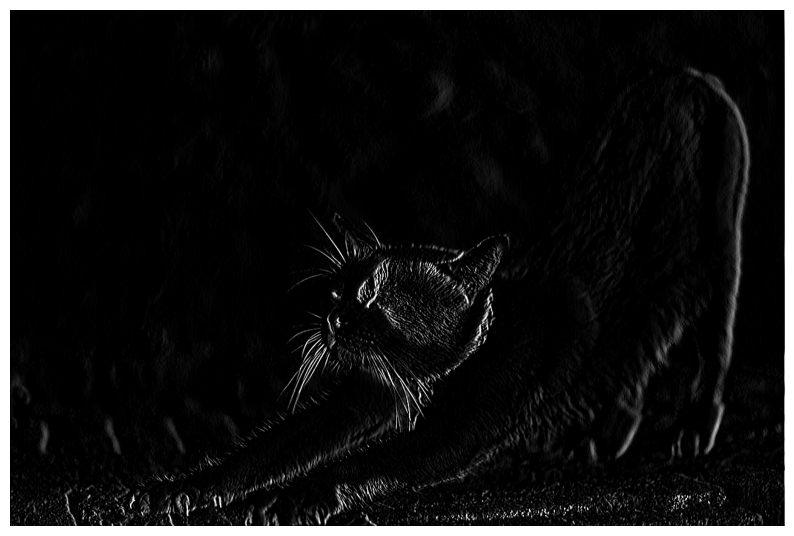

In [37]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (10.0, 8.0)


# Creating a plot with convolved image
plt.imshow(output, cmap=plt.get_cmap('gray'))


# Hiding axes
plt.axis('off')


# Showing the plot
plt.show()


## 4.4 What if input image is RGB?

📜 **Sub-Content:**  
  
💠 4.4.**1** **Initialize** 2D Convolutional Layer by Tensorflow for RGB input  
💠 4.4.**2** **Pass** RGB input through Tensorflow Conv2D layer  
💠 4.4.**3** **Get** current weights  
💠 4.4.**4** **Set up** new weights  
💠 4.4.**5** **Pass** RGB input through Tensorflow Conv2D layer with updated weights  
💠 4.4.**6** **Visualize** obtained feature map  


### 4.4.1 Initialize 2D Convolutional Layer by Tensorflow for RGB input

In [38]:
# If you're using environment for GPU, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, try out following options:
# Option-1: close all Jupyter Notebooks, and re-open just this one Jupyter Notebook
# Option-2: switch to the environment for CPU usage only instead of GPU


# Initializing Conv2D layer for RGB input
layer = tf.keras.layers.Conv2D(filters=1,
                               kernel_size=(3, 3),
                               strides=1,
                               padding='same',
                               activation='relu',
                               input_shape=x_input_RGB.shape[1:],
                               use_bias=False,
                               kernel_initializer=tf.keras.initializers.constant(f1_3))


# Check point
print('Tensorflow Conv2D layer is successfully initialized ' + '\U0001F44C')


Tensorflow Conv2D layer is successfully initialized 👌


### 4.4.2 Pass RGB input through Tensorflow Conv2D layer

In [39]:
# Passing RGB input to the initialized Conv2D layer
output = layer(x_input_RGB)


# Check points
print('Convolution is successfully applied ' + '\U0001F44C')
print('\n' + 'Shape of the output is :', output.shape)


Convolution is successfully applied 👌

Shape of the output is : (1, 853, 1280, 1)


### 4.4.3 Get current weights

In [40]:
# Getting type of the container that holds weights
print('Datatype of the container that holds weights is :', type(layer.get_weights()))


# Getting lengths of the list that holds weights
print('Lengths of the list that holds weights is       :', len(layer.get_weights()))
print()


# Showing shape of the weights
print(layer.get_weights()[0].shape)
print('\n')


# Showing one channel of the weights themselves
print(layer.get_weights()[0][:, :, 0, 0])


Datatype of the container that holds weights is : <class 'list'>
Lengths of the list that holds weights is       : 1

(3, 3, 3, 1)


[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]]


### 4.4.4 Set up new weights

In [41]:
# Showing shape of the pre-defined filter
print(f2_3.shape)


# Reshaping filter to get following: (height, width, channels, filters)
f_new = f2_3.reshape(3, 3, 3, 1)


# Showing shape of the updated filter
print(f_new.shape)


(3, 3, 3)
(3, 3, 3, 1)


In [42]:
# Showing one channel of the current weights
print(layer.get_weights()[0][:, :, 0, 0])
print()


# Setting up new weights
layer.set_weights([f_new])


# Showing one channel of the updated weights
print(layer.get_weights()[0][:, :, 0, 0])


[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]]

[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]


### 4.4.5 Pass RGB input through Tensorflow Conv2D layer with updated weights

In [43]:
# Passing RGB input to the Conv2D layer with new weights
output = layer(x_input_RGB)


# Slicing from the output just feature map
# Converting output Tensor into Numpy array
output = np.array(output[0, :, :, 0])


# Excluding non-needed values (less than 0 and more than 255)
output = np.clip(output, 0, 255)


# Check points
print('Convolution is successfully applied ' + '\U0001F44C')
print('\n' + 'Shape of the output is :', output.shape)
print('\n' + 'Feature map is successfully sliced from the output')
print('\n' + 'Non-needed values are successfully excluded')


Convolution is successfully applied 👌

Shape of the output is : (853, 1280)

Feature map is successfully sliced from the output

Non-needed values are successfully excluded


### 4.4.6 Visualize obtained feature map

In [44]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (10.0, 8.0)


# Creating a plot with convolved image
plt.imshow(output, cmap=plt.get_cmap('gray'))


# Hiding axes
plt.axis('off')


# Showing the plot
plt.show()


## 4.5 How to use set of filters in one layer?

📜 **Sub-Content:**  
  
💠 4.5.**1** **Initialize** 2D Convolutional Layer by Tensorflow for **GRAY input** and set of filters  
💠 4.5.**2** **Pass** GRAY input through Tensorflow Conv2D layer with set of filters  
💠 4.5.**3** **Get** current weights for GRAY input  
💠 4.5.**4** **Set up** new weights for GRAY input  
💠 4.5.**5** **Pass GRAY** input through Tensorflow Conv2D layer with updated weights  
💠 4.5.**6** **Visualize** obtained feature maps for GRAY input  
💠 4.5.**7** **Initialize** 2D Convolutional Layer by Tensorflow for **RGB input** and set of filters  
💠 4.5.**8** **Pass** RGB input through Tensorflow Conv2D layer with set of filters  
💠 4.5.**9** **Get** current weights for RGB input  
💠 4.5.**10** **Set up** new weights for RGB input  
💠 4.5.**11** **Pass RGB** input through Tensorflow Conv2D layer with updated weights  
💠 4.5.**12** **Visualize** obtained feature maps for RGB input  


### 4.5.1 Initialize 2D Convolutional Layer by Tensorflow for GRAY input and set of filters

In [45]:
# If you're using environment for GPU, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, try out following options:
# Option-1: close all Jupyter Notebooks, and re-open just this one Jupyter Notebook
# Option-2: switch to the environment for CPU usage only instead of GPU


# Initializing Conv2D layer for GRAY input and set of filters
layer = tf.keras.layers.Conv2D(filters=2,
                               kernel_size=(3, 3),
                               strides=1,
                               padding='same',
                               activation='relu',
                               input_shape=x_input_GRAY.shape[1:],
                               use_bias=False,
                               kernel_initializer=tf.keras.initializers.constant(f11))


# Check point
print('Tensorflow Conv2D layer is successfully initialized ' + '\U0001F44C')


Tensorflow Conv2D layer is successfully initialized 👌


### 4.5.2 Pass GRAY input through Tensorflow Conv2D layer with set of filters

In [46]:
# Passing GRAY input to the initialized Conv2D layer with set of filters
output = layer(x_input_GRAY)


# Check points
print('Convolution is successfully applied ' + '\U0001F44C')
print('\n' + 'Shape of the output is :', output.shape)
print('\n')


Convolution is successfully applied 👌

Shape of the output is : (1, 853, 1280, 2)




### 4.5.3 Get current weights for GRAY input

In [47]:
# Getting type of the container that holds weights
print('Datatype of the container that holds weights is :', type(layer.get_weights()))


# Getting lengths of the list that holds weights
print('Lengths of the list that holds weights is       :', len(layer.get_weights()))
print()


# Showing shape of the weights
print(layer.get_weights()[0].shape)  # (3, 3, 1, 2)
print('\n')


# Showing one channel of the 2 weights themselves
print(layer.get_weights()[0][:, :, 0, 0])
print('\n')
print(layer.get_weights()[0][:, :, 0, 1])


Datatype of the container that holds weights is : <class 'list'>
Lengths of the list that holds weights is       : 1

(3, 3, 1, 2)


[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]]


[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]


### 4.5.4 Set up new weights for GRAY input

In [48]:
# Showing shape of the pre-defined GRAY set of filters
print(f11.shape)
print('\n')


(3, 3, 1, 2)




In [49]:
# Showing one channel of the current weights
print('Originally defined weights:\n')
print(f11[:, :, 0, 0])
print()
print(f11[:, :, 0, 1])
print('\n')


# Setting up new weights
# Swapping them
f11[:, :, 0, 0],  f11[:, :, 0, 1] = np.copy(f11[:, :, 0, 1]),  np.copy(f11[:, :, 0, 0])




# Showing one channel of the updated weights
print('Weights after swapping:\n')
print(f11[:, :, 0, 0])
print()
print(f11[:, :, 0, 1])


Originally defined weights:

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]

[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


Weights after swapping:

[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [50]:
# Showing one channel of the current weights
print('Initialized weights:\n')
print(layer.get_weights()[0][:, :, 0, 0])
print()
print(layer.get_weights()[0][:, :, 0, 1])
print('\n')


# Setting up new weights
layer.set_weights([f11])


# Showing one channel of the updated weights
print('Updated weights:\n')
print(layer.get_weights()[0][:, :, 0, 0])
print()
print(layer.get_weights()[0][:, :, 0, 1])


Initialized weights:

[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]]

[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]


Updated weights:

[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]

[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]]


### 4.5.5 Pass GRAY input through Tensorflow Conv2D layer with updated weights

In [51]:
# Passing GRAY input to the Conv2D layer with new weights
output = layer(x_input_GRAY)


# Slicing from the output just feature maps
# Converting output Tensor into Numpy array
output = np.array(output[0, :, :, :])


# Excluding non-needed values (less than 0 and more than 255)
output = np.clip(output, 0, 255)


# Check points
print('Convolution is successfully applied ' + '\U0001F44C')
print('\n' + 'Shape of the output is :', output.shape)
print('\n' + 'Feature maps are successfully sliced from the output')
print('\n' + 'Non-needed values are successfully excluded')


Convolution is successfully applied 👌

Shape of the output is : (853, 1280, 2)

Feature maps are successfully sliced from the output

Non-needed values are successfully excluded


### 4.5.6 Visualize obtained feature maps for GRAY input

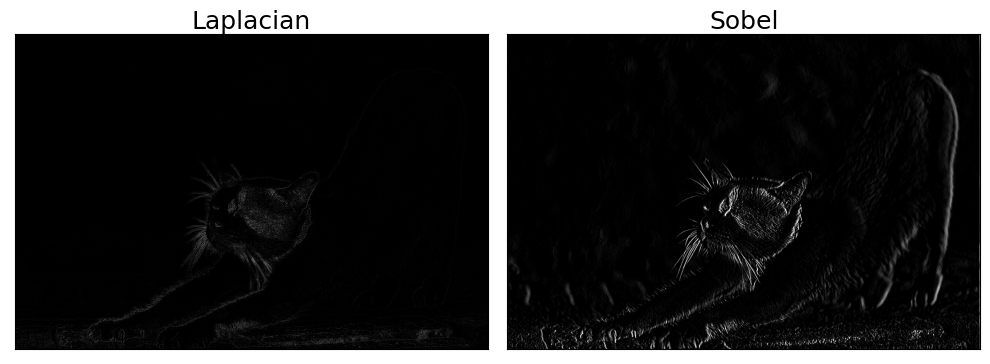

In [52]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (10.0, 8.0)


# Defining a figure object with number of needed subplots
figure, ax = plt.subplots(nrows=1, ncols=2)
# ax is a (2,) Numpy array and to access specific subplot we call it by ax[0]


# Adjusting 1st column
ax[0].imshow(output[:, :, 0], cmap=plt.get_cmap('gray'))


# Adjusting 2nd column
ax[1].imshow(output[:, :, 1], cmap=plt.get_cmap('gray'))


# Hiding axes to all subplots
for i in range(2):
    ax[i].axes.xaxis.set_ticks([])
    ax[i].axes.yaxis.set_ticks([])


# Giving names to subplots along X axis
ax[0].set_xlabel('Laplacian', fontsize=18)
ax[1].set_xlabel('Sobel', fontsize=18)


# Moving subplots names to the top positions
ax[0].xaxis.set_label_position('top')
ax[1].xaxis.set_label_position('top')


# Adjusting distance between subplots
plt.tight_layout()


# Showing the plot
plt.show()


### 4.5.7 Initialize 2D Convolutional Layer by Tensorflow for RGB input and set of filters

In [53]:
# If you're using environment for GPU, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, try out following options:
# Option-1: close all Jupyter Notebooks, and re-open just this one Jupyter Notebook
# Option-2: switch to the environment for CPU usage only instead of GPU


# Initializing Conv2D layer for GRAY input and set of filters
layer = tf.keras.layers.Conv2D(filters=2,
                               kernel_size=(3, 3),
                               strides=1,
                               padding='same',
                               activation='relu',
                               input_shape=x_input_RGB.shape[1:],
                               use_bias=False,
                               kernel_initializer=tf.keras.initializers.constant(f22))


# Check point
print('Tensorflow Conv2D layer is successfully initialized ' + '\U0001F44C')


Tensorflow Conv2D layer is successfully initialized 👌


### 4.5.8 Pass RGB input through Tensorflow Conv2D layer with set of filters

In [54]:
# Passing RGB input to the initialized Conv2D layer with set of filters
output = layer(x_input_RGB)


# Check points
print('Convolution is successfully applied ' + '\U0001F44C')
print('\n' + 'Shape of the output is :', output.shape)
print('\n')


Convolution is successfully applied 👌

Shape of the output is : (1, 853, 1280, 2)




### 4.5.9 Get current weights for RGB input

In [55]:
# Getting type of the container that holds weights
print('Datatype of the container that holds weights is :', type(layer.get_weights()))


# Getting lengths of the list that holds weights
print('Lengths of the list that holds weights is       :', len(layer.get_weights()))
print()


# Showing shape of the weights
print(layer.get_weights()[0].shape)
print('\n')


# Showing one channel of the 2 weights themselves
print(layer.get_weights()[0][:, :, 0, 0])
print('\n')
print(layer.get_weights()[0][:, :, 0, 1])


Datatype of the container that holds weights is : <class 'list'>
Lengths of the list that holds weights is       : 1

(3, 3, 3, 2)


[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]]


[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]


### 4.5.10 Set up new weights for RGB input

In [56]:
# Showing shape of the pre-defined RGB set of filters
print(f22.shape)
print('\n')


(3, 3, 3, 2)




In [57]:
# Showing one channel of the current weights
print('Originally defined weights:\n')
print(f22[:, :, 0, 0])
print()
print(f22[:, :, 0, 1])
print('\n')


# Setting up new weights
# Swapping them
f22[:, :, :, 0],  f22[:, :, :, 1] = np.copy(f22[:, :, :, 1]),  np.copy(f22[:, :, :, 0])





# Showing one channel of the updated weights
print('Weights after swapping:\n')
print(f22[:, :, 0, 0])
print()
print(f22[:, :, 0, 1])


Originally defined weights:

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]

[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


Weights after swapping:

[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [58]:
# Showing one channel of the current weights
print('Initialized weights:\n')
print(layer.get_weights()[0][:, :, 0, 0])
print()
print(layer.get_weights()[0][:, :, 0, 1])
print('\n')


# Setting up new weights
layer.set_weights([f22])


# Showing one channel of the updated weights
print('Updated weights:\n')
print(layer.get_weights()[0][:, :, 0, 0])
print()
print(layer.get_weights()[0][:, :, 0, 1])


Initialized weights:

[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]]

[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]


Updated weights:

[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]

[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]]


### 4.5.11 Pass RGB input through Tensorflow Conv2D layer with updated weights

In [59]:
# Passing RGB input to the Conv2D layer with new weights
output = layer(x_input_RGB)


# Slicing from the output just feature maps
# Converting output Tensor into Numpy array
output = np.array(output[0, :, :, :])


# Excluding non-needed values (less than 0 and more than 255)
output = np.clip(output, 0, 255)


# Check points
print('Convolution is successfully applied ' + '\U0001F44C')
print('\n' + 'Shape of the output is :', output.shape)
print('\n' + 'Feature maps are successfully sliced from the output')
print('\n' + 'Non-needed values are successfully excluded')


Convolution is successfully applied 👌

Shape of the output is : (853, 1280, 2)

Feature maps are successfully sliced from the output

Non-needed values are successfully excluded


### 4.5.12 Visualize obtained feature maps for RGB input

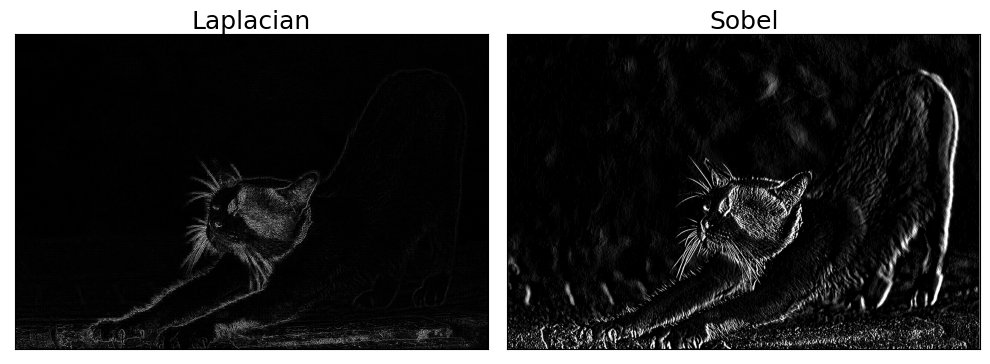

In [60]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (10.0, 8.0)


# Defining a figure object with number of needed subplots
figure, ax = plt.subplots(nrows=1, ncols=2)
# ax is a (2,) Numpy array and to access specific subplot we call it by ax[0]


# Adjusting 1st column
ax[0].imshow(output[:, :, 0], cmap=plt.get_cmap('gray'))


# Adjusting 2nd column
ax[1].imshow(output[:, :, 1], cmap=plt.get_cmap('gray'))


# Hiding axes to all subplots
for i in range(2):
    ax[i].axes.xaxis.set_ticks([])
    ax[i].axes.yaxis.set_ticks([])


# Giving names to subplots along X axis
ax[0].set_xlabel('Laplacian', fontsize=18)
ax[1].set_xlabel('Sobel', fontsize=18)


# Moving subplots names to the top positions
ax[0].xaxis.set_label_position('top')
ax[1].xaxis.set_label_position('top')


# Adjusting distance between subplots
plt.tight_layout()


# Showing the plot
plt.show()


## 4.6 Visualize final results

📜 **Sub-Content:**  
  
💠 4.6.**1** **Initialize** 2D Convolutional Layer by Tensorflow for GRAY and RGB input and set of filters  
💠 4.6.**2** **Pass** GRAY and RGB input through Tensorflow Conv2D layer  
💠 4.6.**3** **Visualize** obtained feature maps for GRAY and RGB input  


### 4.6.1 Initialize 2D Convolutional Layer by Tensorflow for GRAY and RGB input and set of filters

In [61]:
# If you're using environment for GPU, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, try out following options:
# Option-1: close all Jupyter Notebooks, and re-open just this one Jupyter Notebook
# Option-2: switch to the environment for CPU usage only instead of GPU


# Initializing Conv2D layer for GRAY input and set of filters
layer_for_GRAY_input = tf.keras.layers.Conv2D(filters=2,
                               kernel_size=(3, 3),
                               strides=1,
                               padding='same',
                               activation='relu',
                               input_shape=x_input_GRAY.shape[1:],
                               use_bias=False,
                               kernel_initializer=tf.keras.initializers.constant(f11))


# Check point
print('Tensorflow Conv2D layer is successfully initialized ' + '\U0001F44C')


Tensorflow Conv2D layer is successfully initialized 👌


In [62]:
# If you're using environment for GPU, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, try out following options:
# Option-1: close all Jupyter Notebooks, and re-open just this one Jupyter Notebook
# Option-2: switch to the environment for CPU usage only instead of GPU


# Initializing Conv2D layer for RGB input and set of filters
layer_for_RGB_input = tf.keras.layers.Conv2D(filters=2,
                               kernel_size=(3, 3),
                               strides=1,
                               padding='same',
                               activation='relu',
                               input_shape=x_input_RGB.shape[1:],
                               use_bias=False,
                               kernel_initializer=tf.keras.initializers.constant(f22))


# Check point
print('Tensorflow Conv2D layer is successfully initialized ' + '\U0001F44C')


Tensorflow Conv2D layer is successfully initialized 👌


### 4.6.2 Pass GRAY and RGB input through Tensorflow Conv2D layer

In [63]:
# Passing GRAY input to the Conv2D layer with new weights
output_from_GRAY_input = layer_for_GRAY_input(x_input_GRAY)


# Slicing from the output just feature maps
# Converting output Tensor into Numpy array
output_from_GRAY_input = np.array(output_from_GRAY_input[0, :, :, :])


# Excluding non-needed values (less than 0 and more than 255)
output_from_GRAY_input = np.clip(output_from_GRAY_input, 0, 255)


# Check points
print('Convolution is successfully applied ' + '\U0001F44C')
print('\n' + 'Shape of the output is :', output_from_GRAY_input.shape)
print('\n' + 'Feature maps are successfully sliced from the output')
print('\n' + 'Non-needed values are successfully excluded')


Convolution is successfully applied 👌

Shape of the output is : (853, 1280, 2)

Feature maps are successfully sliced from the output

Non-needed values are successfully excluded


In [64]:
# Passing RGB input to the Conv2D layer with new weights
output_from_RGB_input = layer_for_RGB_input(x_input_RGB)


# Slicing from the output just feature maps
# Converting output Tensor into Numpy array
output_from_RGB_input = np.array(output_from_RGB_input[0, :, :, :])


# Excluding non-needed values (less than 0 and more than 255)
output_from_RGB_input = np.clip(output_from_RGB_input, 0, 255)


# Check points
print('Convolution is successfully applied ' + '\U0001F44C')
print('\n' + 'Shape of the output is :', output_from_RGB_input.shape)
print('\n' + 'Feature maps are successfully sliced from the output')
print('\n' + 'Non-needed values are successfully excluded')


Convolution is successfully applied 👌

Shape of the output is : (853, 1280, 2)

Feature maps are successfully sliced from the output

Non-needed values are successfully excluded


### 4.6.3 Visualize obtained feature maps for GRAY and RGB input

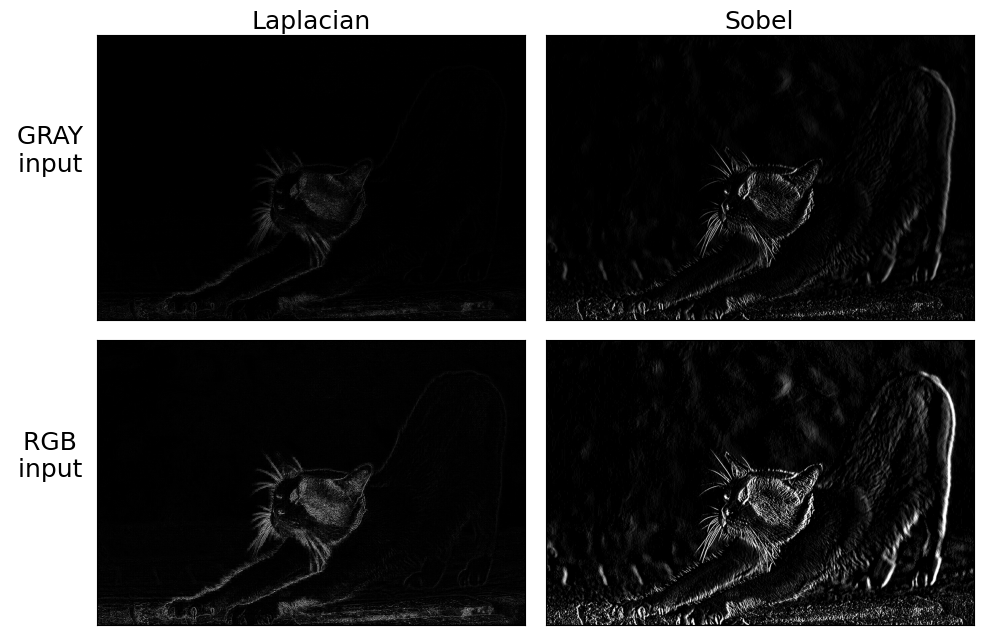

In [65]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (10.0, 6.5)


# Defining a figure object with number of needed subplots
figure, ax = plt.subplots(nrows=2, ncols=2)
# ax is a (2, 2) Numpy array and to access specific subplot we call it by ax[0, 0]


# Adjusting 1st column
ax[0, 0].imshow(output_from_GRAY_input[:, :, 0], cmap=plt.get_cmap('gray'))
ax[1, 0].imshow(output_from_RGB_input[:, :, 0], cmap=plt.get_cmap('gray'))


# Adjusting 2nd column
ax[0, 1].imshow(output_from_GRAY_input[:, :, 1], cmap=plt.get_cmap('gray'))
ax[1, 1].imshow(output_from_RGB_input[:, :, 1], cmap=plt.get_cmap('gray'))


# Hiding axes to all subplots
for i in range(2):
    for j in range(2):
        ax[i, j].axes.xaxis.set_ticks([])
        ax[i, j].axes.yaxis.set_ticks([])


# Giving names to X & Y axes
ax[0, 0].set_xlabel('Laplacian', fontsize=18)
ax[0, 0].xaxis.set_label_position('top')
ax[0, 1].set_xlabel('Sobel', fontsize=18)
ax[0, 1].xaxis.set_label_position('top')

ax[0, 0].set_ylabel('GRAY         \n input          ', fontsize=18, rotation='horizontal')
ax[1, 0].set_ylabel('RGB         \n input          ', fontsize=18, rotation='horizontal')


# Adjusting distance between subplots
plt.tight_layout()


# Saving the plot
# (!) On Windows, the path might look like following:
# r'images\2d_convolution_Tensorflow.png'
# or:
# 'images\\2d_convolution_Tensorflow.png'
figure.savefig('images/2d_convolution_Tensorflow.png', transparent=True, dpi=500)


# Showing the plot
plt.show()


#  🔘 Step 5: Apply 2D convolution by Keras

📜 **Content:**  
  
💠 5.**1** **Set** up weights for GRAY and RGB input  
💠 5.**2** **Initialize** 2D Convolutional Layer by Keras for GRAY and RGB input and set of filters  
💠 5.**3** **Display** built CNN models  
💠 5.**4** **Pass** GRAY and RGB input through Keras Conv2D layer  
💠 5.**5** **Visualize** obtained feature maps for GRAY and RGB input  


### 5.1 Set up weights for GRAY and RGB input

In [66]:
# Showing shape of the pre-defined GRAY set of filters
print(f11.shape)


# Showing shape of the pre-defined RGB set of filters
print(f22.shape)
print('\n')


(3, 3, 1, 2)
(3, 3, 3, 2)




### 5.2 Initialize 2D Convolutional Layer by Keras for GRAY and RGB input and set of filters

In [67]:
# If you're using environment for GPU, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, try out following options:
# Option-1: close all Jupyter Notebooks, and re-open just this one Jupyter Notebook
# Option-2: switch to the environment for CPU usage only instead of GPU


# Initializing Keras model for GRAY input and set of filters by class 'Sequential()'
# Other option is to initialize Keras model by class 'Model()'
model_GRAY = Sequential()


# Adding Conv2D layer to the model for GRAY input and set of filters
model_GRAY.add(Conv2D(filters=2,
                      kernel_size=(3, 3),
                      strides=1,
                      padding='same',
                      activation='relu',
                      input_shape=x_input_GRAY.shape[1:],
                      use_bias=False,
                      weights=[f11]))


# Check point
print('Keras model with Conv2D layer is successfully initialized ' + '\U0001F44C')


Keras model with Conv2D layer is successfully initialized 👌


In [68]:
# If you're using environment for GPU, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, try out following options:
# Option-1: close all Jupyter Notebooks, and re-open just this one Jupyter Notebook
# Option-2: switch to the environment for CPU usage only instead of GPU


# Initializing Keras model for RGB input and set of filters by class 'Sequential()'
# Other option is to initialize Keras model by class 'Model()'
model_RGB = Sequential()


# Adding Conv2D layer to the model for RGB input and set of filters
model_RGB.add(Conv2D(filters=2,
                     kernel_size=(3, 3),
                     strides=1,
                     padding='same',
                     activation='relu',
                     input_shape=x_input_RGB.shape[1:],
                     use_bias=False,
                     weights=[f22]))


# Check point
print('Keras model with Conv2D layer is successfully initialized ' + '\U0001F44C')


Keras model with Conv2D layer is successfully initialized 👌


### 5.3 Display built CNN models

In [69]:
# Showing GRAY model's summary in form of table
model_GRAY.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 853, 1280, 2)      18        
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


In [70]:
# Showing RGB model's summary in form of table
model_RGB.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 853, 1280, 2)      54        
Total params: 54
Trainable params: 54
Non-trainable params: 0
_________________________________________________________________


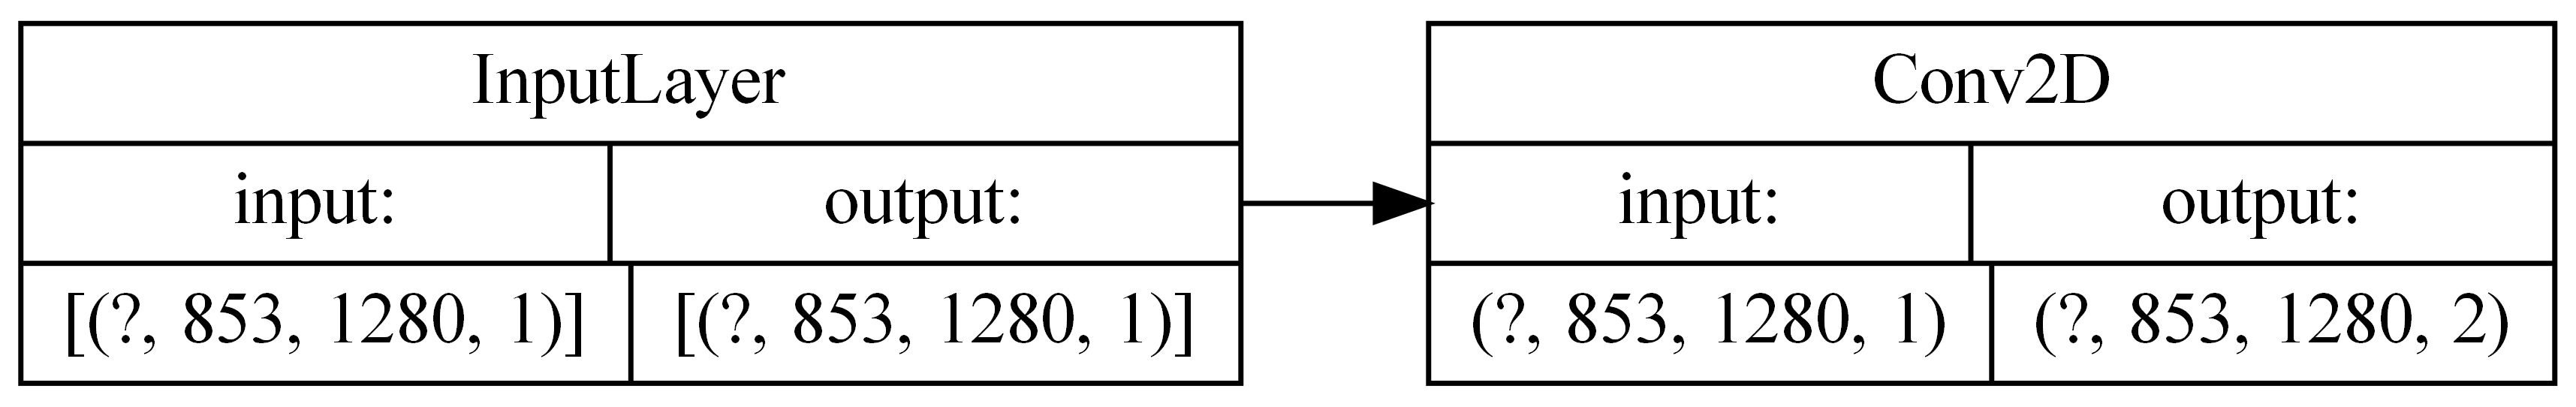

In [71]:
# Plotting GRAY model's layers in form of flowchart
plot_model(model_GRAY,
           show_shapes=True,
           show_layer_names=False,
           rankdir='LR',
           dpi=500)


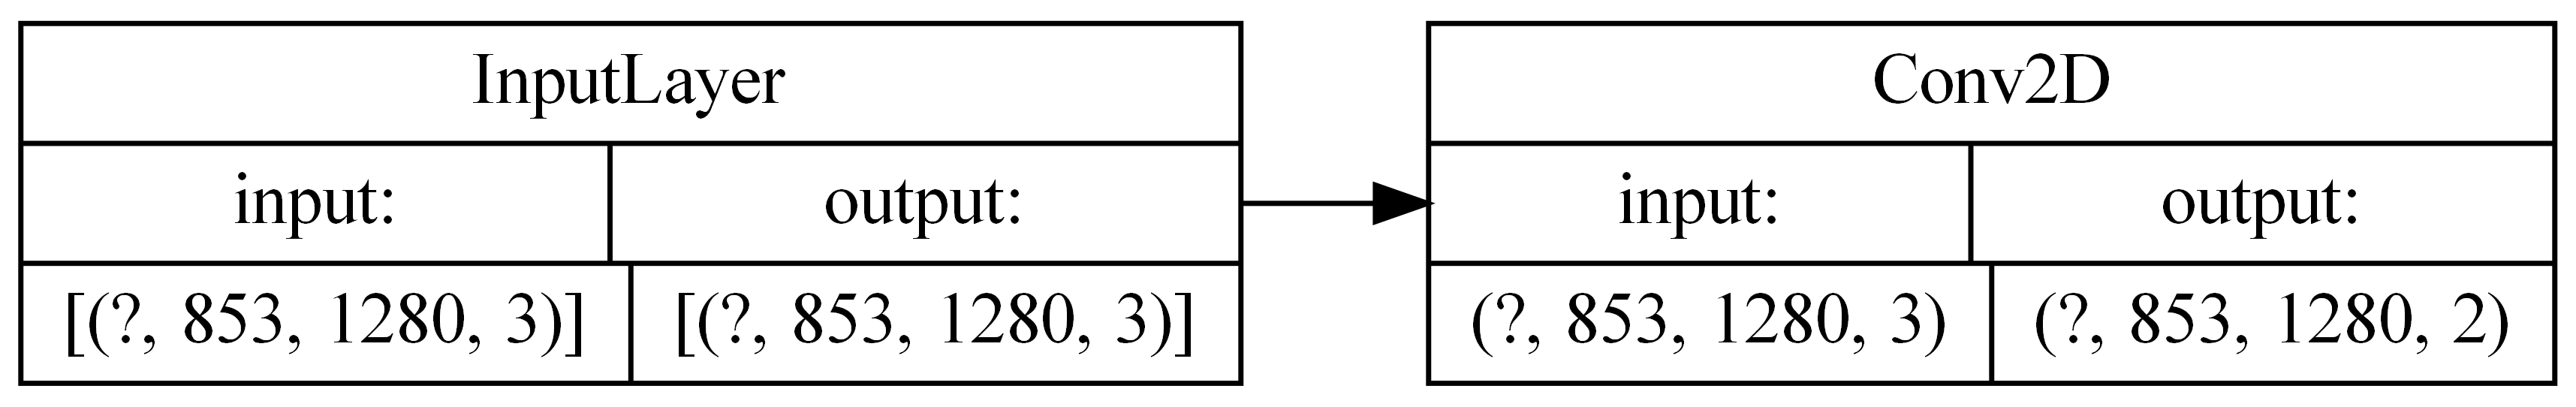

In [72]:
# Plotting RGB model's layers in form of flowchart
plot_model(model_RGB,
           show_shapes=True,
           show_layer_names=False,
           rankdir='LR',
           dpi=500)


### 5.4 Pass GRAY and RGB input through Keras Conv2D layer

In [73]:
# Passing GRAY input to the Conv2D layer
output_from_GRAY_input = model_GRAY.predict(x_input_GRAY)


# Slicing from the output just feature maps
# Converting output Tensor into Numpy array
output_from_GRAY_input = np.array(output_from_GRAY_input[0, :, :, :])


# Excluding non-needed values (less than 0 and more than 255)
output_from_GRAY_input = np.clip(output_from_GRAY_input, 0, 255)


# Check points
print('Convolution is successfully applied ' + '\U0001F44C')
print('\n' + 'Shape of the output is :', output_from_GRAY_input.shape)
print('\n' + 'Feature maps are successfully sliced from the output')
print('\n' + 'Non-needed values are successfully excluded')


Convolution is successfully applied 👌

Shape of the output is : (853, 1280, 2)

Feature maps are successfully sliced from the output

Non-needed values are successfully excluded


In [74]:
# Passing RGB input to the Conv2D layer
output_from_RGB_input = model_RGB.predict(x_input_RGB)


# Slicing from the output just feature maps
# Converting output Tensor into Numpy array
output_from_RGB_input = np.array(output_from_RGB_input[0, :, :, :])


# Excluding non-needed values (less than 0 and more than 255)
output_from_RGB_input = np.clip(output_from_RGB_input, 0, 255)


# Check points
print('Convolution is successfully applied ' + '\U0001F44C')
print('\n' + 'Shape of the output is :', output_from_RGB_input.shape)
print('\n' + 'Feature maps are successfully sliced from the output')
print('\n' + 'Non-needed values are successfully excluded')


Convolution is successfully applied 👌

Shape of the output is : (853, 1280, 2)

Feature maps are successfully sliced from the output

Non-needed values are successfully excluded


In [75]:
# Getting type of the container that holds layers for the entire model
print('Datatype of the container that holds layers is  :', type(model_GRAY.layers))  # list
print('Datatype of the container that holds layers is  :', type(model_RGB.layers))   # list
print()


# Getting length of the list that holds layers for the entire model
print('Lengths of the list that holds layers is        :', len(model_GRAY.layers))  # 1
print('Lengths of the list that holds layers is        :', len(model_RGB.layers))   # 1
print()


# Getting type of the container that holds weights for 2D convolutional layer
print('Datatype of the container that holds weights is :', type(model_GRAY.layers[0].get_weights()))
print('Datatype of the container that holds weights is :', type(model_RGB.layers[0].get_weights()))
print()


# Getting lengths of the list that holds weights for 2D convolutional layer
print('Lengths of the list that holds weights is       :', len(model_GRAY.layers[0].get_weights()))
print('Lengths of the list that holds weights is       :', len(model_RGB.layers[0].get_weights()))
print()


# Showing shape of the weights
print(model_GRAY.layers[0].get_weights()[0].shape)  # (3, 3, 1, 2)
print(model_RGB.layers[0].get_weights()[0].shape)   # (3, 3, 3, 2)
print()


# Showing one channel of the weights themselves
print(model_GRAY.layers[0].get_weights()[0][:, :, 0, 0])
print()
print(model_RGB.layers[0].get_weights()[0][:, :, 0, 0])
print()


Datatype of the container that holds layers is  : <class 'list'>
Datatype of the container that holds layers is  : <class 'list'>

Lengths of the list that holds layers is        : 1
Lengths of the list that holds layers is        : 1

Datatype of the container that holds weights is : <class 'list'>
Datatype of the container that holds weights is : <class 'list'>

Lengths of the list that holds weights is       : 1
Lengths of the list that holds weights is       : 1

(3, 3, 1, 2)
(3, 3, 3, 2)

[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]

[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]



In [76]:
# Setting up new weights for GRAY model
model_GRAY.layers[0].set_weights([f11])



# Setting up new weights for RGB model
model_RGB.layers[0].set_weights([f22])




### 5.5 Visualize obtained feature maps for GRAY and RGB input

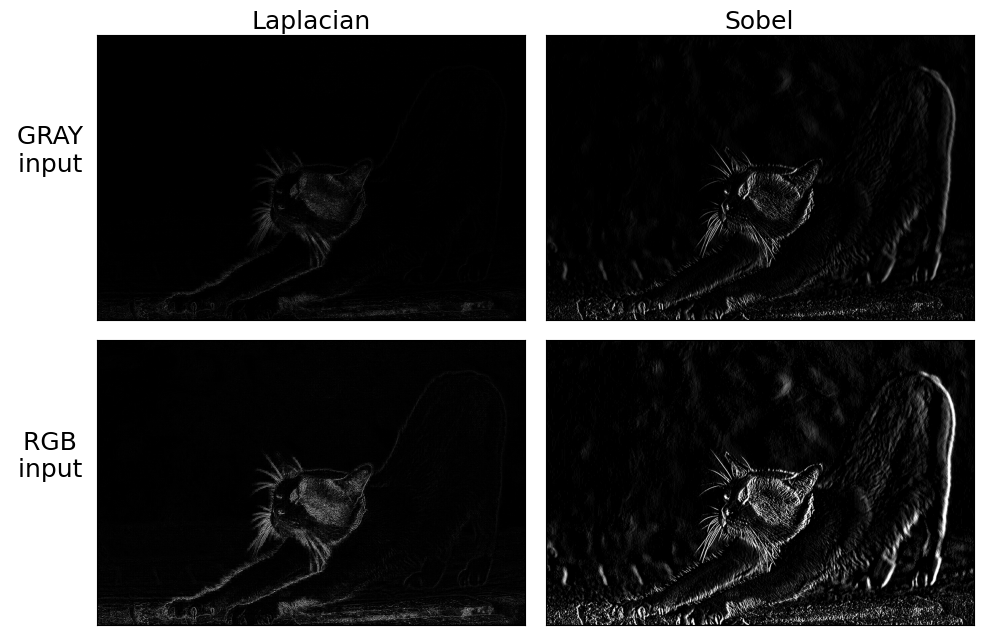

In [77]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (10.0, 6.5)


# Defining a figure object with number of needed subplots
figure, ax = plt.subplots(nrows=2, ncols=2)
# ax is a (2, 2) Numpy array and to access specific subplot we call it by ax[0, 0]


# Adjusting 1st column
ax[0, 0].imshow(output_from_GRAY_input[:, :, 0], cmap=plt.get_cmap('gray'))
ax[1, 0].imshow(output_from_RGB_input[:, :, 0], cmap=plt.get_cmap('gray'))


# Adjusting 2nd column
ax[0, 1].imshow(output_from_GRAY_input[:, :, 1], cmap=plt.get_cmap('gray'))
ax[1, 1].imshow(output_from_RGB_input[:, :, 1], cmap=plt.get_cmap('gray'))


# Hiding axes to all subplots
for i in range(2):
    for j in range(2):
        ax[i, j].axes.xaxis.set_ticks([])
        ax[i, j].axes.yaxis.set_ticks([])


# Giving names to X & Y axes
ax[0, 0].set_xlabel('Laplacian', fontsize=18)
ax[0, 0].xaxis.set_label_position('top')
ax[0, 1].set_xlabel('Sobel', fontsize=18)
ax[0, 1].xaxis.set_label_position('top')

ax[0, 0].set_ylabel('GRAY         \n input          ', fontsize=18, rotation='horizontal')
ax[1, 0].set_ylabel('RGB         \n input          ', fontsize=18, rotation='horizontal')


# Adjusting distance between subplots
plt.tight_layout()


# Saving the plot
# (!) On Windows, the path might look like following:
# r'images\2d_convolution_Keras.png'
# or:
# 'images\\2d_convolution_Keras.png'
figure.savefig('images/2d_convolution_Keras.png', transparent=True, dpi=500)


# Showing the plot
plt.show()


 # ⏱️ Step 6: Compute time spent for 2D convolution

📜 **Content:**  
  
💠 6.**1** Time spent for 2D convolution by **'for' loop**  
💠 6.**2** Time spent for 2D convolution by **Tensorflow**  
💠 6.**3** Time spent for 2D convolution by **Keras**  


### 6.1 Time spent for 2D convolution by 'for' loop

In [78]:
# Applying to input GRAY image pad frame
image_GRAY_pad = np.pad(image_GRAY, (1, 1), mode='constant', constant_values=0)


# Preparing zero valued array for convolved output image
output = np.zeros(image_GRAY.shape)


# Measuring spent time
# Start point
start = timer()


# Implementing convolution operation to GRAY image
# Sliding through entire input image (that is with pad frame) by Sobel filter
# Wrapping the loop with 'tqdm' in order to see progress in Real Time
for i in tqdm(range(image_GRAY_pad.shape[0] - 2)):
    for j in range(image_GRAY_pad.shape[1] - 2):
        # Extracting (slicing) a 3x3 patch (the same size with filter)
        # from input image with pad frame
        patch = image_GRAY_pad[i:i+3, j:j+3]

        # Applying elementwise multiplication and summation -
        # this is convolution operation
        # When we use '*' with matrices, then elementwise multiplication
        # will be applied

        # With Sobel filter
        output[i, j] = np.sum(patch * f1)

        
# Measuring spent time
# End point
end = timer()


# Check points
# Showing computed time
print('Convolution is successfully applied ' + '\U0001F44C')
print('Time : {0:.5f} seconds'.format(end - start))


100%|███████████████████████████████████████████████████████████████████████████████| 853/853 [00:06<00:00, 122.56it/s]

Convolution is successfully applied 👌
Time : 6.97126 seconds


### 6.2 Time spent for 2D convolution by Tensorflow

In [79]:
# If you're using environment for GPU, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, try out following options:
# Option-1: close all Jupyter Notebooks, and re-open just this one Jupyter Notebook
# Option-2: switch to the environment for CPU usage only instead of GPU


# Initializing Conv2D layer for GRAY input
layer = tf.keras.layers.Conv2D(filters=1,
                               kernel_size=(3, 3),
                               strides=1,
                               padding='same',
                               activation='relu',
                               input_shape=x_input_GRAY.shape[1:],
                               use_bias=False,
                               kernel_initializer=tf.keras.initializers.constant(f1))


# Measuring spent time
# Start point
start = timer()


# Passing GRAY input to the Tensorflow Conv2D layer
output = layer(x_input_GRAY)


# Measuring spent time
# End point
end = timer()


# Check points
# Showing computed time
print('Convolution is successfully applied ' + '\U0001F44C')
print('Time : {0:.5f} seconds'.format(end - start))


Convolution is successfully applied 👌
Time : 0.02044 seconds


### 6.3 Time spent for 2D convolution by Keras

In [80]:
# Reshaping filter to get following: (height, width, channels, filters)
f_new = f1.reshape(3, 3, 1, 1)


# Initializing Keras model for GRAY input and set of filters
model_GRAY = Sequential()


# Adding Conv2D layer to the model for GRAY input
model_GRAY.add(Conv2D(filters=1,
                      kernel_size=(3, 3),
                      strides=1,
                      padding='same',
                      activation='relu',
                      input_shape=x_input_GRAY.shape[1:],
                      use_bias=False,
                      weights=[f_new]))


# Measuring spent time
# Start point
start = timer()


# Passing GRAY input to the Keras Conv2D layer
output = model_GRAY.predict(x_input_GRAY)


# Measuring spent time
# End point
end = timer()


# Check points
# Showing computed time
print('Convolution is successfully applied ' + '\U0001F44C')
print('Time : {0:.5f} seconds'.format(end - start))


Convolution is successfully applied 👌
Time : 0.06651 seconds


# 📽️ Step 7: Implement 2D convolution on video

In [81]:
# If you're using environment for GPU, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, try out following options:
# Option-1: close all Jupyter Notebooks, and re-open just this one Jupyter Notebook
# Option-2: switch to the environment for CPU usage only instead of GPU


# Defining 'VideoCapture' object and reading video from a file
# (!) On Windows, the path might look like following:
# r'videos\polar_bear.mp4'
# or:
# 'videos\\polar_bear.mp4'
video = cv2.VideoCapture('videos/polar_bear.mp4')


# Preparing variables for writers that will be used to write processed frames into video files
writer_BGR = None
writer_GRAY = None


# Preparing variables for spatial dimensions of the captured frames
h, w = None, None


# Getting version of OpenCV that is currently used
# Converting string into the list by dot as separator and getting first number
v = cv2.__version__.split('.')[0]


# Defining variable for counting frames
# At the end we will show total amount of processed frames
f = 0


# Defining variable for calculating total spent time
# At the end we will show time spent for processing all frames
t = 0


# Defining loop for capturing frames
while True:
    # Capturing frame-by-frame
    ret, frame_BGR = video.read()

    # If the frame was not retrieved
    # e.g.: at the end of the video,
    # then we break the loop
    if not ret:
        break

    # Getting spatial dimension of the frame
    # We do it only once from the very beginning
    # All other frames have the same dimensions
    if w is None or h is None:
        # Getting shape of the caught frame
        (h, w, c) = frame_BGR.shape
        
        
        # Initializing Conv2D layer for RGB input
        # We do it only once from the very beginning
        layer = tf.keras.layers.Conv2D(filters=1,
                                       kernel_size=(3, 3),
                                       strides=1,
                                       padding='same',
                                       activation='relu',
                                       input_shape=(h, w, c),
                                       use_bias=False,
                                       kernel_initializer=tf.keras.initializers.constant(f1_3))
        
        
    """
    Start of:
    Implementing 2D convolution to the captured frame
    """
    
    # Converting captured frame to RGB by OpenCV function
    frame_RGB = cv2.cvtColor(frame_BGR, cv2.COLOR_BGR2RGB)
    
    
    # Reshaping frame to get following: (batch size, rows, columns, channels)
    x_input_RGB = frame_RGB.reshape(1, h, w, c).astype(np.float32)
    
    
    # Passing RGB input to the initialized Conv2D layer
    # Calculating time spent for 2D convolution
    start = timer()
    output = layer(x_input_RGB)
    end = timer()
    
    
    # Slicing from the output just feature map
    # Converting output Tensor into Numpy array
    output = np.array(output[0, :, :, 0])
    
    
    # To exclude values that are less than 0 and more than 255,
    # Numpy function 'clip' is applied
    # It keeps values of Numpy array in the given range
    # And it replaces non-needed values with boundary numbers
    output = np.clip(output, 0, 255).astype(np.uint8)
    
    
    # Increasing counters for frames and total spent time
    f += 1
    t += end - start
    
    
    # Showing spent time for single current frame
    print('Frame number {0} took {1:.5f} seconds'.format(f, end - start))
    

    """
    End of:
    Implementing 2D convolution to the captured frame
    """
    
    
    """
    Start of:
    Finding contours
    """
    
    # Finding contours
    # (!) Different versions of OpenCV returns different number of parameters
    # when using function cv2.findContours()

    # In OpenCV version 3 function cv2.findContours() returns three parameters:
    # modified image, found contours and hierarchy
    # All found contours from current frame are stored in the list
    # Each individual contour is a Numpy array of(x, y) coordinates
    # of the boundary points of the object
    # We are interested only in contours

    # Checking if OpenCV version 3 is used
    if v == '3':
        _, contours, _ = cv2.findContours(output, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    
    
    
    
    # In OpenCV version 4 function cv2.findContours() returns two parameters:
    # found contours and hierarchy
    # All found contours from current frame are stored in the list
    # Each individual contour is a Numpy array of(x, y) coordinates
    # of the boundary points of the object
    # We are interested only in contours

    # Checking if OpenCV version 4 is used
    else:
        contours, _ = cv2.findContours(output, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    
    
    
    
    # Finding the biggest contour by sorting from biggest to smallest
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    
    
    """
    End of:
    Finding contours
    """
    
    
    """
    Start of:
    Drawing bounding box and label
    """
    
    # Extracting coordinates of the biggest contour if any was found
    if contours:
        # Getting rectangle coordinates and spatial dimension of the biggest contour
        # Function cv2.boundingRect() is used to get an approximate rectangle
        # around the region of interest in the binary image after contour was found
        (x_min, y_min, box_width, box_height) = cv2.boundingRect(contours[0])
        
        
        # Drawing bounding box on the current BGR frame
        cv2.rectangle(frame_BGR,
                      (x_min, y_min),
                      (x_min + box_width, y_min + box_height),
                      (0, 255, 0),
                      3)
        
        
        # Preparing text for the label
        label = 'Polar Bear'
        
        
        # Putting text with label on the current BGR frame
        cv2.putText(frame_BGR,
                    label,
                    (x_min - 5, y_min - 25),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    1.5,
                    (0, 255, 0),
                    2)        
        
    """
    End of:
    Drawing bounding box and label
    """
    
    
    """
    Start of:
    Writing processed frames into the files
    """
    
    # Initializing writer for BGR frame
    # we do it only once from the very beginning
    # when we get spatial dimensions of the frames
    if writer_BGR is None:
        # Constructing code of the codec
        # to be used in the function VideoWriter
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')

        # Writing current processed BGR frame into the video file
        # (!) On Windows, the path might look like following:
        # r'videos\result_RGB.mp4'
        # or:
        # 'videos\\result_RGB.mp4'
        writer_BGR = cv2.VideoWriter('videos/result_RGB.mp4',
                                     fourcc,
                                     30,
                                     (w, h),
                                     True)
        
        
    # Initializing writer for GRAY output
    # we do it only once from the very beginning
    # when we get spatial dimensions of the frames
    if writer_GRAY is None:
        # Constructing code of the codec
        # to be used in the function VideoWriter
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')

        # Writing current processed GRAY output into the video file
        # (!) On Windows, the path might look like following:
        # r'videos\result_GRAY.mp4'
        # or:
        # 'videos\\result_GRAY.mp4'
        writer_GRAY = cv2.VideoWriter('videos/result_GRAY.mp4',
                                      fourcc,
                                      30,
                                      (w, h),
                                      False)
        
        
    # Write processed current BGR frame to the file
    writer_BGR.write(frame_BGR)
    
    # Write processed current GRAY output to the file
    writer_GRAY.write(output)
    
    
    """
    End of:
    Writing processed frames into the files
    """
    
    
# Printing final results
print()
print('Total number of frames is              :', f)
print('Total spent time for 2D convolution is : {:.5f} seconds'.format(t))
print('FPS rate is                            :', round((f / t), 1))
print('\n')


# Releasing video reader and writers
video.release()
writer_BGR.release()
writer_GRAY.release()


Frame number 1 took 0.04831 seconds
Frame number 2 took 0.04607 seconds
Frame number 3 took 0.04858 seconds
Frame number 4 took 0.05030 seconds
Frame number 5 took 0.05064 seconds
Frame number 6 took 0.04732 seconds
Frame number 7 took 0.04827 seconds
Frame number 8 took 0.04770 seconds
Frame number 9 took 0.04622 seconds
Frame number 10 took 0.05018 seconds
Frame number 11 took 0.05010 seconds
Frame number 12 took 0.04798 seconds
Frame number 13 took 0.04480 seconds
Frame number 14 took 0.06182 seconds
Frame number 15 took 0.05134 seconds
Frame number 16 took 0.05073 seconds
Frame number 17 took 0.04846 seconds
Frame number 18 took 0.05246 seconds
Frame number 19 took 0.04851 seconds
Frame number 20 took 0.04988 seconds
Frame number 21 took 0.04614 seconds
Frame number 22 took 0.04854 seconds
Frame number 23 took 0.04544 seconds
Frame number 24 took 0.04139 seconds
Frame number 25 took 0.04679 seconds
Frame number 26 took 0.04670 seconds
Frame number 27 took 0.04511 seconds
Frame numb

# 🗒️ Some comments

✔️ To get more details for usage of ***Numpy functions:***  
> print(help(**np.copy**))  
> print(help(**np.clip**))  
  
🔗 More details and examples are here:  
> https://numpy.org/doc/stable/reference/generated/numpy.copy.html  
> https://numpy.org/devdocs/reference/generated/numpy.clip.html  
  
  <br/>
  
✔️ To get more details for usage of ***Tensorflow:***  
> print(help(**tf.keras.layers.Conv2D**))  
  
🔗 More details and examples are here:  
> https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D  
  
  <br/>
  
✔️ To get more details for usage of ***Keras:***  
> print(help(**Sequential**))  
> print(help(**Conv2D**))  
> print(help(**plot_model**))  
> print(help(**Sequential.get_weights**))  
> print(help(**Sequential.set_weights**))  
> print(help(**Sequential.load_weights**))  
> print(help(**Sequential.predict**))  
  
🔗 More details and examples are here:  
> https://keras.io/api/models/sequential/  
> https://keras.io/api/layers/convolution_layers/convolution2d/  
> https://keras.io/api/utils/model_plotting_utils/#plot_model-function  
  
  <br/>
  
✔️ To get more details for usage of ***OpenCV functions:***  
> print(help(**cv2.VideoCapture**))  
> print(help(**cv2.findContours**))  
> print(help(**cv2.rectangle**))  
> print(help(**cv2.putText**))  
> print(help(**cv2.VideoWriter_fourcc**))  
> print(help(**cv2.VideoWriter**))  
  
🔗 More details and examples are here:  
> https://docs.opencv.org/3.4/d8/dfe/classcv_1_1VideoCapture.html  
> https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html  
> https://docs.opencv.org/4.0.0/d4/d73/tutorial_py_contours_begin.html  
> https://docs.opencv.org/master/dc/da5/tutorial_py_drawing_functions.html  
> https://docs.opencv.org/3.4/dd/d9e/classcv_1_1VideoWriter.html  
> http://www.fourcc.org  
  
  <br/>
  

In [82]:
import numpy as np


print(help(np.copy))
print('\n')
print(help(np.clip))


Help on function copy in module numpy:

copy(a, order='K', subok=False)
    Return an array copy of the given object.
    
    Parameters
    ----------
    a : array_like
        Input data.
    order : {'C', 'F', 'A', 'K'}, optional
        Controls the memory layout of the copy. 'C' means C-order,
        'F' means F-order, 'A' means 'F' if `a` is Fortran contiguous,
        'C' otherwise. 'K' means match the layout of `a` as closely
        as possible. (Note that this function and :meth:`ndarray.copy` are very
        similar, but have different default values for their order=
        arguments.)
    subok : bool, optional
        If True, then sub-classes will be passed-through, otherwise the
        returned array will be forced to be a base-class array (defaults to False).
    
        .. versionadded:: 1.19.0
    
    Returns
    -------
    arr : ndarray
        Array interpretation of `a`.
    
    See Also
    --------
    ndarray.copy : Preferred method for creating an arr

In [83]:
import tensorflow as tf


print(help(tf.keras.layers.Conv2D))
print('\n')


Help on class Conv2D in module tensorflow.python.keras.layers.convolutional:

class Conv2D(Conv)
 |  Conv2D(*args, **kwargs)
 |  
 |  2D convolution layer (e.g. spatial convolution over images).
 |  
 |  This layer creates a convolution kernel that is convolved
 |  with the layer input to produce a tensor of
 |  outputs. If `use_bias` is True,
 |  a bias vector is created and added to the outputs. Finally, if
 |  `activation` is not `None`, it is applied to the outputs as well.
 |  
 |  When using this layer as the first layer in a model,
 |  provide the keyword argument `input_shape`
 |  (tuple of integers, does not include the sample axis),
 |  e.g. `input_shape=(128, 128, 3)` for 128x128 RGB pictures
 |  in `data_format="channels_last"`.
 |  
 |  Examples:
 |  
 |  >>> # The inputs are 28x28 RGB images with `channels_last` and the batch
 |  >>> # size is 4.
 |  >>> input_shape = (4, 28, 28, 3)
 |  >>> x = tf.random.normal(input_shape)
 |  >>> y = tf.keras.layers.Conv2D(
 |  ... 2, 3

In [84]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.utils import plot_model


print(help(Sequential))
print('\n')
print(help(Conv2D))
print('\n')
print(help(plot_model))
print('\n')
print(help(Sequential.get_weights))
print('\n')
print(help(Sequential.set_weights))
print('\n')
print(help(Sequential.load_weights))
print('\n')
print(help(Sequential.predict))


Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evalua

In [85]:
import cv2


print(help(cv2.VideoCapture))
print('\n')
print(help(cv2.findContours))
print('\n')
print(help(cv2.rectangle))
print('\n')
print(help(cv2.putText))
print('\n')
print(help(cv2.VideoWriter_fourcc))
print('\n')
print(help(cv2.VideoWriter))
print('\n')


Help on class VideoCapture in module cv2:

class VideoCapture(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  get(...)
 |      get(propId) -> retval
 |      .   @brief Returns the specified VideoCapture property
 |      .   
 |      .       @param propId Property identifier from cv::VideoCaptureProperties (eg. cv::CAP_PROP_POS_MSEC, cv::CAP_PROP_POS_FRAMES, ...)
 |      .       or one from @ref videoio_flags_others
 |      .       @return Value for the specified property. Value 0 is returned when querying a property that is
 |      .       not supported by the backend used by the VideoCapture instance.
 |      .   
 |      .       @note Reading / writing properties involves many layers. Some unexpected result might happens
 |      .       along this chain.
 |      .       @code{.txt}
 |      .       VideoCapture -> 

In [86]:
# Prewitt filter to detect vertical changes on image
f3 = np.array([[1, 0, -1], 
               [1, 0, -1], 
               [1, 0, -1]])


In [87]:
# Prewitt filter to detect horizontal changes on image
f4 = np.array([[1, 1, 1],  
               [0, 0, 0],  
               [-1, -1, -1]])


In [88]:
# Sobel filter to detect horizontal changes on image
f5 = np.array([[1, 2, 1],  
               [0, 0, 0],  
               [-1, -2, -1]])


In [89]:
# Gaussian blur filter
f6 = (1 / 16) * np.array([[1, 2, 1],
                          [2, 4, 2],
                          [1, 2, 1]])
